In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns

In [2]:
train_df = pd.read_csv('./data/train.csv')


In [3]:
train_df.drop('PassengerId',axis=1,inplace=True)

In [4]:
#Preview Data
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df = pd.read_csv('./data/test.csv',index_col="PassengerId" )


In [6]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


categorical: survived, sex, embarked, Pclass(ordinal), sibsp, parch


In [8]:
train_df['Survived'] = train_df['Survived'].astype('category')

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 70.7+ KB


In [10]:
train_df['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [11]:
features = ['Pclass', 'Sex', 'SibSp','Parch','Embarked']
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_cat(train_df, features)
convert_cat(test_df, features)


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 41.3+ KB


In [13]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Distribution of Categorical Features

In [14]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


3. Exploratory Data Analysis (EDA)
Correlating categorical features
- categorical: Survived, Sex, Embarked, Pclass, SibSp, Parch

In [15]:
# Target variable is Survived
train_df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In [16]:
train_df['Survived'].value_counts(normalize=True).to_frame()


,Survived
0,0.616162
1,0.383838


In [17]:
train_df['Sex'].value_counts().to_frame()


,Sex
male,577
female,314


In [18]:
train_df['Sex'].value_counts(normalize=True).to_frame()


,Sex
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

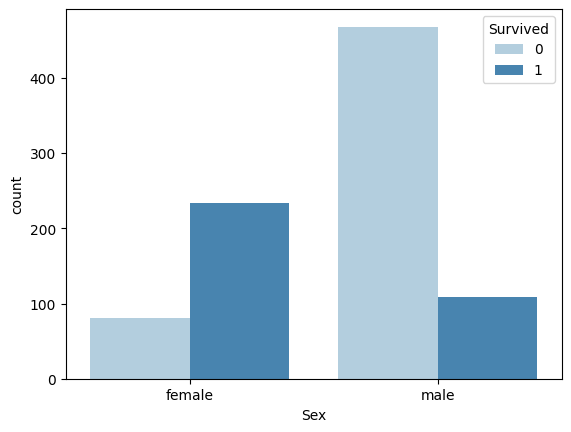

In [19]:
sns.countplot(data=train_df, x="Sex",hue= 'Survived' ,palette='Blues')

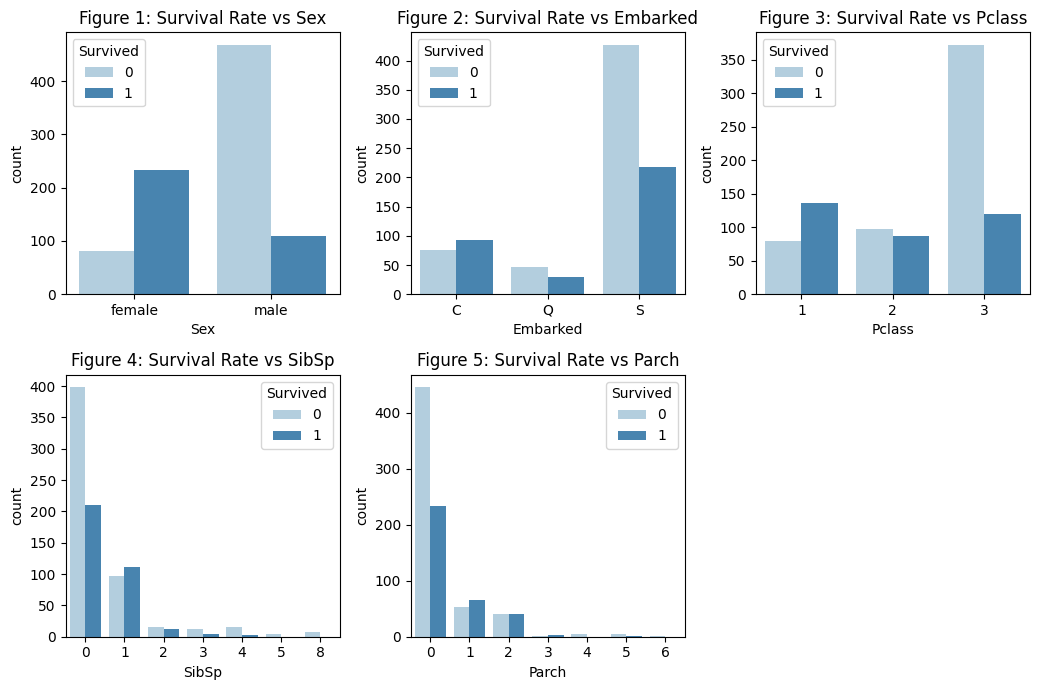

In [20]:
cols = ["Sex", "Embarked", "Pclass", "SibSp","Parch"] 
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows , n_cols, figsize= (n_cols * 3.5 , n_rows *3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):  
        i = r*n_cols + c 
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data= train_df, x=cols[i], hue="Survived",palette= "Blues", ax= ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
ax.flat[-1].set_visible(False)
plt.tight_layout()